In [1]:
# to read ROOT files with python
import uproot
# use numpy for arrays
import numpy as np

import awkward as ak

# library to make and plot histograms
import hist

import matplotlib.pyplot as plt

# style library
import mplhep as hep

#used for curve fitting
from scipy.stats import norm

#used to make data four vectors
import vector

import matplotlib.colors as colors

#used for four vectors
import coffea

#used for efficiency plots
from hist.intervals import clopper_pearson_interval

In [2]:
filename = "ldmx_genie_G18_02a_02_11b_Ti_8GeV_110197_ntup.root"
open = uproot.open(filename)["Events"]

In [3]:
open.keys()

['genie_truth_interaction_type',
 'genie_truth_scattering_type',
 'genie_truth_rescatter_code',
 'nElectron',
 'maxE',
 'maxPt',
 'Electron_e',
 'Electron_eClus',
 'Electron_zClus',
 'Electron_px',
 'Electron_py',
 'Electron_pz',
 'Electron_dx',
 'Electron_dy',
 'Electron_x',
 'Electron_y',
 'Electron_tp',
 'Electron_depth',
 'Truth_x',
 'Truth_y',
 'Truth_px',
 'Truth_py',
 'Truth_pz',
 'Truth_e',
 'Truth_pdgId',
 'TruthEcal_x',
 'TruthEcal_y',
 'TruthEcal_px',
 'TruthEcal_py',
 'TruthEcal_pz',
 'TruthEcal_e',
 'TruthEcal_pdgId',
 'Ecal_e_afterLayer',
 'Ecal_e_nLayer',
 'Hcal_e_afterLayer',
 'Hcal_e_nLayer']

reco data
- run through ak.firsts to create lists all of one dimension

In [4]:
nElectron = np.asarray(open["nElectron"])
Electron_e = ak.firsts(open["Electron_e"].array()).to_numpy().data
Electron_eClus = ak.firsts(open["Electron_eClus"].array()).to_numpy().data
Electron_zClus = ak.firsts(open["Electron_zClus"].array()).to_numpy().data
Electron_px = ak.firsts(open["Electron_px"].array()).to_numpy().data
Electron_py = ak.firsts(open["Electron_py"].array()).to_numpy().data
Electron_pz = ak.firsts(open["Electron_pz"].array()).to_numpy().data
Electron_dx = ak.firsts(open["Electron_dx"].array()).to_numpy().data
Electron_dy = ak.firsts(open["Electron_dy"].array()).to_numpy().data
Electron_x = ak.firsts(open["Electron_x"].array()).to_numpy().data
Electron_y = ak.firsts(open["Electron_y"].array()).to_numpy().data
Electron_tp = ak.firsts(open["Electron_tp"].array()).to_numpy().data
Electron_depth = ak.firsts(open["Electron_depth"].array()).to_numpy().data
Electron_ecal_x = Electron_dx+Electron_x
Electron_ecal_y = Electron_dy+Electron_y
Electron_pT = np.sqrt(Electron_px**2 + Electron_py**2)
afterLayer = ak.firsts(open["Ecal_e_afterLayer"].array()).to_numpy().data

truth data

In [5]:
Truth_x = np.asarray(open["Truth_x"])
Truth_y = np.asarray(open["Truth_y"])
Truth_px = np.asarray(open["Truth_px"])
Truth_py = np.asarray(open["Truth_py"])
Truth_pz = np.asarray(open["Truth_pz"])
Truth_e = np.asarray(open["Truth_e"])
TruthEcal_x = np.asarray(open["TruthEcal_x"])
TruthEcal_y = np.asarray(open["TruthEcal_y"])
TruthEcal_px = np.asarray(open["TruthEcal_px"])
TruthEcal_py = np.asarray(open["TruthEcal_py"])
TruthEcal_pz = np.asarray(open["TruthEcal_pz"])
TruthEcal_e = np.asarray(open["TruthEcal_e"])
Truth_pdgId = np.asarray(open["Truth_pdgId"])
TruthEcal_pdgId = np.asarray(open["TruthEcal_pdgId"])
Ecal_e_afterLayer = ak.firsts(open["Ecal_e_afterLayer"].array()).to_numpy().data
TruthEcal_dx = TruthEcal_x - Truth_x
TruthEcal_dy = TruthEcal_y - Truth_y
TruthEcal_pT = np.sqrt(TruthEcal_px**2 + TruthEcal_py**2)

# truth info on scattering/interaction types
genie_truth_interaction_type = np.asarray(open["genie_truth_interaction_type"])
genie_truth_scattering_type = np.asarray(open["genie_truth_scattering_type"])
genie_truth_rescatter_code = np.asarray(open["genie_truth_rescatter_code"])

Quality cuts
- run all of the particle information through position & displacement (beam spot), energy, pdgID, z position, and depth quality cuts

In [7]:
p_Electron_x = Electron_x
p_Electron_y = Electron_y
p_Electron_dx = Electron_dx
p_Electron_dy = Electron_dy
p_Truth_x = Truth_x
p_Truth_y = Truth_y
p_TruthEcal_x = TruthEcal_x
p_TruthEcal_y = TruthEcal_y
p_Electron_depth = Electron_depth
p_Electron_py = Electron_py
p_Electron_zClus = Electron_zClus

electron_x #1

In [8]:
pad_Electron_E = Electron_e[abs(p_Electron_x)<10]
pad_Electron_px = Electron_px[abs(p_Electron_x)<10]
pad_Electron_py = Electron_py[abs(p_Electron_x)<10]
pad_Electron_dx = Electron_dx[abs(p_Electron_x)<10]
pad_Electron_dy = Electron_dy[abs(p_Electron_x)<10]
pad_Electron_x = Electron_x[abs(p_Electron_x)<10]
pad_Electron_y = Electron_y[abs(p_Electron_x)<10]
pad_Electron_pT = Electron_pT[abs(p_Electron_x)<10]
pad_Electron_depth = Electron_depth[abs(p_Electron_x)<10]
pad_Electron_zClus = Electron_zClus[abs(p_Electron_x)<10]
pad_Electron_tp = Electron_tp[abs(p_Electron_x)<10]
pad_afterLayer = afterLayer[abs(p_Electron_x)<10]
pad_TruthEcal_E = TruthEcal_e[abs(p_Electron_x)<10]
pad_TruthEcal_px = TruthEcal_px[abs(p_Electron_x)<10]
pad_TruthEcal_py = TruthEcal_py[abs(p_Electron_x)<10]
pad_TruthEcal_dx = TruthEcal_dx[abs(p_Electron_x)<10]
pad_TruthEcal_dy = TruthEcal_dy[abs(p_Electron_x)<10]
pad_TruthEcal_x = TruthEcal_x[abs(p_Electron_x)<10]
pad_TruthEcal_y = TruthEcal_y[abs(p_Electron_x)<10]
pad_TruthEcal_pT = TruthEcal_pT[abs(p_Electron_x)<10]
pad_Truth_x = Truth_x[abs(p_Electron_x)<10]
pad_Truth_y = Truth_y[abs(p_Electron_x)<10]
pad_nElectron = nElectron[abs(p_Electron_x)<10]
cut_Truth_pdgID = Truth_pdgId[abs(p_Electron_x)<10]
pad_scattering_type = genie_truth_scattering_type[abs(p_Electron_x)<10]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_x)<10]
p_Electron_y = p_Electron_y[abs(p_Electron_x)<10]
p_Electron_dx = p_Electron_dx[abs(p_Electron_x)<10]
p_Electron_dy = p_Electron_dy[abs(p_Electron_x)<10]
p_Truth_x = p_Truth_x[abs(p_Electron_x)<10]
p_Truth_y = p_Truth_y[abs(p_Electron_x)<10]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Electron_x)<10]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Electron_x)<10]
p_Electron_depth = p_Electron_depth[abs(p_Electron_x)<10]
p_Electron_py = p_Electron_py[abs(p_Electron_x)<10]
p_Electron_x = p_Electron_x[abs(p_Electron_x)<10]

electron_x #2

In [9]:
pad_Electron_E = pad_Electron_E[abs(p_Electron_x)>1e-6]
pad_Electron_px = pad_Electron_px[abs(p_Electron_x)>1e-6]
pad_Electron_py = pad_Electron_py[abs(p_Electron_x)>1e-6]
pad_Electron_dx = pad_Electron_dx[abs(p_Electron_x)>1e-6]
pad_Electron_dy = pad_Electron_dy[abs(p_Electron_x)>1e-6]
pad_Electron_pT = pad_Electron_pT[abs(p_Electron_x)>1e-6]
pad_Electron_x = pad_Electron_x[abs(p_Electron_x)>1e-6]
pad_Electron_y = pad_Electron_y[abs(p_Electron_x)>1e-6]
pad_Electron_depth = pad_Electron_depth[abs(p_Electron_x)>1e-6]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Electron_x)>1e-6]
pad_Electron_tp = pad_Electron_tp[abs(p_Electron_x)>1e-6]
pad_afterLayer = pad_afterLayer[abs(p_Electron_x)>1e-6]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_x)>1e-6]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_x)>1e-6]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_x)>1e-6]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_x)>1e-6]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_x)>1e-6]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_x)>1e-6]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_x)>1e-6]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_x)>1e-6]
pad_Truth_x = pad_Truth_x[abs(p_Electron_x)>1e-6]
pad_Truth_y = pad_Truth_y[abs(p_Electron_x)>1e-6]
pad_nElectron = pad_nElectron[abs(p_Electron_x)>1e-6]
cut_Truth_pdgID = cut_Truth_pdgID[abs(p_Electron_x)>1e-6]
pad_scattering_type = pad_scattering_type[abs(p_Electron_x)>1e-6]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_x)>1e-6]
p_Electron_y = p_Electron_y[abs(p_Electron_x)>1e-6]
p_Electron_dx = p_Electron_dx[abs(p_Electron_x)>1e-6]
p_Electron_dy = p_Electron_dy[abs(p_Electron_x)>1e-6]
p_Truth_x = p_Truth_x[abs(p_Electron_x)>1e-6]
p_Truth_y = p_Truth_y[abs(p_Electron_x)>1e-6]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Electron_x)>1e-6]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Electron_x)>1e-6]
p_Electron_depth = p_Electron_depth[abs(p_Electron_x)>1e-6]
p_Electron_py = p_Electron_py[abs(p_Electron_x)>1e-6]
p_Electron_x = p_Electron_x[abs(p_Electron_x)>1e-6]

electron_y

In [10]:
pad_Electron_E = pad_Electron_E[abs(p_Electron_y)<40]
pad_Electron_px = pad_Electron_px[abs(p_Electron_y)<40]
pad_Electron_py = pad_Electron_py[abs(p_Electron_y)<40]
pad_Electron_dx = pad_Electron_dx[abs(p_Electron_y)<40]
pad_Electron_dy = pad_Electron_dy[abs(p_Electron_y)<40]
pad_Electron_pT = pad_Electron_pT[abs(p_Electron_y)<40]
pad_Electron_x = pad_Electron_x[abs(p_Electron_y)<40]
pad_Electron_y = pad_Electron_y[abs(p_Electron_y)<40]
pad_Electron_depth = pad_Electron_depth[abs(p_Electron_y)<40]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Electron_y)<40]
pad_Electron_tp = pad_Electron_tp[abs(p_Electron_y)<40]
pad_afterLayer = pad_afterLayer[abs(p_Electron_y)<40]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_y)<40]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_y)<40]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_y)<40]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_y)<40]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_y)<40]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_y)<40]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_y)<40]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_y)<40]
pad_Truth_x = pad_Truth_x[abs(p_Electron_y)<40]
pad_Truth_y = pad_Truth_y[abs(p_Electron_y)<40]
pad_nElectron = pad_nElectron[abs(p_Electron_y)<40]
cut_Truth_pdgID = cut_Truth_pdgID[abs(p_Electron_y)<40]
pad_scattering_type = pad_scattering_type[abs(p_Electron_y)<40]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_y)<40]
p_Electron_dy = p_Electron_dy[abs(p_Electron_y)<40]
p_Truth_x = p_Truth_x[abs(p_Electron_y)<40]
p_Truth_y = p_Truth_y[abs(p_Electron_y)<40]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Electron_y)<40]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Electron_y)<40]
p_Electron_depth = p_Electron_depth[abs(p_Electron_y)<40]
p_Electron_py = p_Electron_py[abs(p_Electron_y)<40]
p_Electron_dx = p_Electron_dx[abs(p_Electron_y)<40]
p_Electron_x = p_Electron_x[abs(p_Electron_y)<40]
p_Electron_y = p_Electron_y[abs(p_Electron_y)<40]

electron_dx

In [11]:
pad_Electron_E = pad_Electron_E[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_px = pad_Electron_px[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_py = pad_Electron_py[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_dx = pad_Electron_dx[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_dy = pad_Electron_dy[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_pT = pad_Electron_pT[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_x = pad_Electron_x[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_y = pad_Electron_y[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_depth = pad_Electron_depth[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Electron_x+p_Electron_dx)<100]
pad_Electron_tp = pad_Electron_tp[abs(p_Electron_x+p_Electron_dx)<100]
pad_afterLayer = pad_afterLayer[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_x+p_Electron_dx)<100]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_x+p_Electron_dx)<100]
pad_nElectron = pad_nElectron[abs(p_Electron_x+p_Electron_dx)<100]
pad_Truth_x = pad_Truth_x[abs(p_Electron_x+p_Electron_dx)<100]
pad_Truth_y = pad_Truth_y[abs(p_Electron_x+p_Electron_dx)<100]
cut_Truth_pdgID = cut_Truth_pdgID[abs(p_Electron_x+p_Electron_dx)<100]
pad_scattering_type = pad_scattering_type[abs(p_Electron_x+p_Electron_dx)<100]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_x+p_Electron_dx)<100]
p_Truth_x = p_Truth_x[abs(p_Electron_x+p_Electron_dx)<100]
p_Truth_y = p_Truth_y[abs(p_Electron_x+p_Electron_dx)<100]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Electron_x+p_Electron_dx)<100]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Electron_x+p_Electron_dx)<100]
p_Electron_depth = p_Electron_depth[abs(p_Electron_x+p_Electron_dx)<100]
p_Electron_py = p_Electron_py[abs(p_Electron_x+p_Electron_dx)<100]
p_Electron_y = p_Electron_y[abs(p_Electron_x+p_Electron_dx)<100]
p_Electron_dy = p_Electron_dy[abs(p_Electron_x+p_Electron_dx)<100]

electron_dy

In [12]:
pad_Electron_E = pad_Electron_E[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_px = pad_Electron_px[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_py = pad_Electron_py[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_dx = pad_Electron_dx[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_dy = pad_Electron_dy[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_pT = pad_Electron_pT[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_x = pad_Electron_x[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_y = pad_Electron_y[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_depth = pad_Electron_depth[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Electron_y+p_Electron_dy)<120]
pad_Electron_tp = pad_Electron_tp[abs(p_Electron_y+p_Electron_dy)<120]
pad_afterLayer = pad_afterLayer[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_y+p_Electron_dy)<120]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_y+p_Electron_dy)<120]
pad_Truth_x = pad_Truth_x[abs(p_Electron_y+p_Electron_dy)<120]
pad_Truth_y = pad_Truth_y[abs(p_Electron_y+p_Electron_dy)<120]
pad_nElectron = pad_nElectron[abs(p_Electron_y+p_Electron_dy)<120]
cut_Truth_pdgID = cut_Truth_pdgID[abs(p_Electron_y+p_Electron_dy)<120]
pad_scattering_type = pad_scattering_type[abs(p_Electron_y+p_Electron_dy)<120]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_y+p_Electron_dy)<120]
p_Truth_x = p_Truth_x[abs(p_Electron_y+p_Electron_dy)<120]
p_Truth_y = p_Truth_y[abs(p_Electron_y+p_Electron_dy)<120]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Electron_y+p_Electron_dy)<120]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Electron_y+p_Electron_dy)<120]
p_Electron_depth = p_Electron_depth[abs(p_Electron_y+p_Electron_dy)<120]
p_Electron_py = p_Electron_py[abs(p_Electron_y+p_Electron_dy)<120]

truth_x #1

In [13]:
pad_Electron_E = pad_Electron_E[abs(p_Truth_x)<10]
pad_Electron_px = pad_Electron_px[abs(p_Truth_x)<10]
pad_Electron_py = pad_Electron_py[abs(p_Truth_x)<10]
pad_Electron_dx = pad_Electron_dx[abs(p_Truth_x)<10]
pad_Electron_dy = pad_Electron_dy[abs(p_Truth_x)<10]
pad_Electron_pT = pad_Electron_pT[abs(p_Truth_x)<10]
pad_Electron_x = pad_Electron_x[abs(p_Truth_x)<10]
pad_Electron_y = pad_Electron_y[abs(p_Truth_x)<10]
pad_Electron_depth = pad_Electron_depth[abs(p_Truth_x)<10]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Truth_x)<10]
pad_Electron_tp = pad_Electron_tp[abs(p_Truth_x)<10]
pad_afterLayer = pad_afterLayer[abs(p_Truth_x)<10]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Truth_x)<10]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Truth_x)<10]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Truth_x)<10]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Truth_x)<10]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Truth_x)<10]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Truth_x)<10]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Truth_x)<10]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Truth_x)<10]
pad_Truth_x = pad_Truth_x[abs(p_Truth_x)<10]
pad_Truth_y = pad_Truth_y[abs(p_Truth_x)<10]
pad_nElectron = pad_nElectron[abs(p_Truth_x)<10]
cut_Truth_pdgID = cut_Truth_pdgID[abs(p_Truth_x)<10]
pad_scattering_type = pad_scattering_type[abs(p_Truth_x)<10]
p_Electron_zClus = p_Electron_zClus[abs(p_Truth_x)<10]
p_Truth_y = p_Truth_y[abs(p_Truth_x)<10]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Truth_x)<10]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Truth_x)<10]
p_Electron_depth = p_Electron_depth[abs(p_Truth_x)<10]
p_Electron_py = p_Electron_py[abs(p_Truth_x)<10]
p_Truth_x = p_Truth_x[abs(p_Truth_x)<10]

truth_x #2

In [14]:
pad_Electron_E = pad_Electron_E[abs(p_Truth_x)>1e-6]
pad_Electron_px = pad_Electron_px[abs(p_Truth_x)>1e-6]
pad_Electron_py = pad_Electron_py[abs(p_Truth_x)>1e-6]
pad_Electron_dx = pad_Electron_dx[abs(p_Truth_x)>1e-6]
pad_Electron_dy = pad_Electron_dy[abs(p_Truth_x)>1e-6]
pad_Electron_pT = pad_Electron_pT[abs(p_Truth_x)>1e-6]
pad_Electron_x = pad_Electron_x[abs(p_Truth_x)>1e-6]
pad_Electron_y = pad_Electron_y[abs(p_Truth_x)>1e-6]
pad_Electron_depth = pad_Electron_depth[abs(p_Truth_x)>1e-6]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Truth_x)>1e-6]
pad_Electron_tp = pad_Electron_tp[abs(p_Truth_x)>1e-6]
pad_afterLayer = pad_afterLayer[abs(p_Truth_x)>1e-6]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Truth_x)>1e-6]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Truth_x)>1e-6]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Truth_x)>1e-6]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Truth_x)>1e-6]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Truth_x)>1e-6]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Truth_x)>1e-6]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Truth_x)>1e-6]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Truth_x)>1e-6]
pad_Truth_x = pad_Truth_x[abs(p_Truth_x)>1e-6]
pad_Truth_y = pad_Truth_y[abs(p_Truth_x)>1e-6]
pad_nElectron = pad_nElectron[abs(p_Truth_x)>1e-6]
cut_Truth_pdgID = cut_Truth_pdgID[abs(p_Truth_x)>1e-6]
pad_scattering_type = pad_scattering_type[abs(p_Truth_x)>1e-6]
p_Electron_zClus = p_Electron_zClus[abs(p_Truth_x)>1e-6]
p_Truth_y = p_Truth_y[abs(p_Truth_x)>1e-6]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Truth_x)>1e-6]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Truth_x)>1e-6]
p_Electron_depth = p_Electron_depth[abs(p_Truth_x)>1e-6]
p_Electron_py = p_Electron_py[abs(p_Truth_x)>1e-6]

truth_y

In [15]:
pad_Electron_E = pad_Electron_E[abs(p_Truth_y)<40]
pad_Electron_px = pad_Electron_px[abs(p_Truth_y)<40]
pad_Electron_py = pad_Electron_py[abs(p_Truth_y)<40]
pad_Electron_dx = pad_Electron_dx[abs(p_Truth_y)<40]
pad_Electron_dy = pad_Electron_dy[abs(p_Truth_y)<40]
pad_Electron_pT = pad_Electron_pT[abs(p_Truth_y)<40]
pad_Electron_x = pad_Electron_x[abs(p_Truth_y)<40]
pad_Electron_y = pad_Electron_y[abs(p_Truth_y)<40]
pad_Electron_depth = pad_Electron_depth[abs(p_Truth_y)<40]
pad_Electron_zClus = pad_Electron_zClus[abs(p_Truth_y)<40]
pad_Electron_tp = pad_Electron_tp[abs(p_Truth_y)<40]
pad_afterLayer = pad_afterLayer[abs(p_Truth_y)<40]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_Truth_y)<40]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_Truth_y)<40]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_Truth_y)<40]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Truth_y)<40]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Truth_y)<40]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Truth_y)<40]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_Truth_y)<40]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_Truth_y)<40]
pad_Truth_x = pad_Truth_x[abs(p_Truth_y)<40]
pad_Truth_y = pad_Truth_y[abs(p_Truth_y)<40]
pad_nElectron = pad_nElectron[abs(p_Truth_y)<40]
cut_Truth_pdgID = cut_Truth_pdgID[abs(p_Truth_y)<40]
pad_scattering_type = pad_scattering_type[abs(p_Truth_y)<40]
p_Electron_zClus = p_Electron_zClus[abs(p_Truth_y)<40]
p_TruthEcal_x = p_TruthEcal_x[abs(p_Truth_y)<40]
p_TruthEcal_y = p_TruthEcal_y[abs(p_Truth_y)<40]
p_Electron_depth = p_Electron_depth[abs(p_Truth_y)<40]
p_Electron_py = p_Electron_py[abs(p_Truth_y)<40]

truthEcal_x

In [16]:
pad_Electron_E = pad_Electron_E[abs(p_TruthEcal_x)<40]
pad_Electron_px = pad_Electron_px[abs(p_TruthEcal_x)<40]
pad_Electron_py = pad_Electron_py[abs(p_TruthEcal_x)<40]
pad_Electron_dx = pad_Electron_dx[abs(p_TruthEcal_x)<40]
pad_Electron_dy = pad_Electron_dy[abs(p_TruthEcal_x)<40]
pad_Electron_pT = pad_Electron_pT[abs(p_TruthEcal_x)<40]
pad_Electron_x = pad_Electron_x[abs(p_TruthEcal_x)<40]
pad_Electron_y = pad_Electron_y[abs(p_TruthEcal_x)<40]
pad_Electron_depth = pad_Electron_depth[abs(p_TruthEcal_x)<40]
pad_Electron_zClus = pad_Electron_zClus[abs(p_TruthEcal_x)<40]
pad_Electron_tp = pad_Electron_tp[abs(p_TruthEcal_x)<40]
pad_afterLayer = pad_afterLayer[abs(p_TruthEcal_x)<40]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_TruthEcal_x)<40]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_TruthEcal_x)<40]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_TruthEcal_x)<40]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_TruthEcal_x)<40]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_TruthEcal_x)<40]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_TruthEcal_x)<40]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_TruthEcal_x)<40]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_TruthEcal_x)<40]
pad_Truth_x = pad_Truth_x[abs(p_TruthEcal_x)<40]
pad_Truth_y = pad_Truth_y[abs(p_TruthEcal_x)<40]
pad_nElectron = pad_nElectron[abs(p_TruthEcal_x)<40]
cut_Truth_pdgID = cut_Truth_pdgID[abs(p_TruthEcal_x)<40]
pad_scattering_type = pad_scattering_type[abs(p_TruthEcal_x)<40]
p_Electron_zClus = p_Electron_zClus[abs(p_TruthEcal_x)<40]
p_TruthEcal_y = p_TruthEcal_y[abs(p_TruthEcal_x)<40]
p_Electron_depth = p_Electron_depth[abs(p_TruthEcal_x)<40]
p_Electron_py = p_Electron_py[abs(p_TruthEcal_x)<40]

truthEcal_y

In [17]:
pad_Electron_E = pad_Electron_E[abs(p_TruthEcal_y)<40]
pad_Electron_px = pad_Electron_px[abs(p_TruthEcal_y)<40]
pad_Electron_py = pad_Electron_py[abs(p_TruthEcal_y)<40]
pad_Electron_dx = pad_Electron_dx[abs(p_TruthEcal_y)<40]
pad_Electron_dy = pad_Electron_dy[abs(p_TruthEcal_y)<40]
pad_Electron_pT = pad_Electron_pT[abs(p_TruthEcal_y)<40]
pad_Electron_x = pad_Electron_x[abs(p_TruthEcal_y)<40]
pad_Electron_y = pad_Electron_y[abs(p_TruthEcal_y)<40]
pad_Electron_depth = pad_Electron_depth[abs(p_TruthEcal_y)<40]
pad_Electron_zClus = pad_Electron_zClus[abs(p_TruthEcal_y)<40]
pad_Electron_tp = pad_Electron_tp[abs(p_TruthEcal_y)<40]
pad_afterLayer = pad_afterLayer[abs(p_TruthEcal_y)<40]
pad_TruthEcal_E = pad_TruthEcal_E[abs(p_TruthEcal_y)<40]
pad_TruthEcal_px = pad_TruthEcal_px[abs(p_TruthEcal_y)<40]
pad_TruthEcal_py = pad_TruthEcal_py[abs(p_TruthEcal_y)<40]
pad_TruthEcal_dx = pad_TruthEcal_dx[abs(p_TruthEcal_y)<40]
pad_TruthEcal_dy = pad_TruthEcal_dy[abs(p_TruthEcal_y)<40]
pad_TruthEcal_pT = pad_TruthEcal_pT[abs(p_TruthEcal_y)<40]
pad_TruthEcal_x = pad_TruthEcal_x[abs(p_TruthEcal_y)<40]
pad_TruthEcal_y = pad_TruthEcal_y[abs(p_TruthEcal_y)<40]
pad_Truth_x = pad_Truth_x[abs(p_TruthEcal_y)<40]
pad_Truth_y = pad_Truth_y[abs(p_TruthEcal_y)<40]
pad_nElectron = pad_nElectron[abs(p_TruthEcal_y)<40]
cut_Truth_pdgID = cut_Truth_pdgID[abs(p_TruthEcal_y)<40]
pad_scattering_type = pad_scattering_type[abs(p_TruthEcal_y)<40]
p_Electron_zClus = p_Electron_zClus[abs(p_TruthEcal_y)<40]
p_Electron_depth = p_Electron_depth[abs(p_TruthEcal_y)<40]
p_Electron_py = p_Electron_py[abs(p_TruthEcal_y)<40]

energy

In [18]:
pad_Electron_E = pad_Electron_E[pad_TruthEcal_E>3e3]
pad_Electron_px = pad_Electron_px[pad_TruthEcal_E>3e3]
pad_Electron_py = pad_Electron_py[pad_TruthEcal_E>3e3]
pad_Electron_dx = pad_Electron_dx[pad_TruthEcal_E>3e3]
pad_Electron_dy = pad_Electron_dy[pad_TruthEcal_E>3e3]
pad_Electron_pT = pad_Electron_pT[pad_TruthEcal_E>3e3]
pad_Electron_x = pad_Electron_x[pad_TruthEcal_E>3e3]
pad_Electron_y = pad_Electron_y[pad_TruthEcal_E>3e3]
pad_Electron_depth = pad_Electron_depth[pad_TruthEcal_E>3e3]
pad_Electron_zClus = pad_Electron_zClus[pad_TruthEcal_E>3e3]
pad_Electron_tp = pad_Electron_tp[pad_TruthEcal_E>3e3]
pad_afterLayer = pad_afterLayer[pad_TruthEcal_E>3e3]
pad_TruthEcal_px = pad_TruthEcal_px[pad_TruthEcal_E>3e3]
pad_TruthEcal_py = pad_TruthEcal_py[pad_TruthEcal_E>3e3]
pad_TruthEcal_dx = pad_TruthEcal_dx[pad_TruthEcal_E>3e3]
pad_TruthEcal_dy = pad_TruthEcal_dy[pad_TruthEcal_E>3e3]
pad_TruthEcal_pT = pad_TruthEcal_pT[pad_TruthEcal_E>3e3]
pad_TruthEcal_x = pad_TruthEcal_x[pad_TruthEcal_E>3e3]
pad_TruthEcal_y = pad_TruthEcal_y[pad_TruthEcal_E>3e3]
pad_Truth_x = pad_Truth_x[pad_TruthEcal_E>3e3]
pad_Truth_y = pad_Truth_y[pad_TruthEcal_E>3e3]
pad_nElectron = pad_nElectron[pad_TruthEcal_E>3e3]
cut_Truth_pdgID = cut_Truth_pdgID[pad_TruthEcal_E>3e3]
pad_scattering_type = pad_scattering_type[pad_TruthEcal_E>3e3]
p_Electron_zClus = p_Electron_zClus[pad_TruthEcal_E>3e3]
p_Electron_depth = p_Electron_depth[pad_TruthEcal_E>3e3]
p_Electron_py = p_Electron_py[pad_TruthEcal_E>3e3]
pad_TruthEcal_E = pad_TruthEcal_E[pad_TruthEcal_E>3e3]

pdgID

In [19]:
pad_Electron_E = pad_Electron_E[cut_Truth_pdgID==11]
pad_Electron_px = pad_Electron_px[cut_Truth_pdgID==11]
pad_Electron_py = pad_Electron_py[cut_Truth_pdgID==11]
pad_Electron_dx = pad_Electron_dx[cut_Truth_pdgID==11]
pad_Electron_dy = pad_Electron_dy[cut_Truth_pdgID==11]
pad_Electron_pT = pad_Electron_pT[cut_Truth_pdgID==11]
pad_Electron_x = pad_Electron_x[cut_Truth_pdgID==11]
pad_Electron_y = pad_Electron_y[cut_Truth_pdgID==11]
pad_Electron_depth = pad_Electron_depth[cut_Truth_pdgID==11]
pad_Electron_zClus = pad_Electron_zClus[cut_Truth_pdgID==11]
pad_Electron_tp = pad_Electron_tp[cut_Truth_pdgID==11]
pad_afterLayer = pad_afterLayer[cut_Truth_pdgID==11]
pad_TruthEcal_px = pad_TruthEcal_px[cut_Truth_pdgID==11]
pad_TruthEcal_py = pad_TruthEcal_py[cut_Truth_pdgID==11]
pad_TruthEcal_dx = pad_TruthEcal_dx[cut_Truth_pdgID==11]
pad_TruthEcal_dy = pad_TruthEcal_dy[cut_Truth_pdgID==11]
pad_TruthEcal_pT = pad_TruthEcal_pT[cut_Truth_pdgID==11]
pad_TruthEcal_x = pad_TruthEcal_x[cut_Truth_pdgID==11]
pad_TruthEcal_y = pad_TruthEcal_y[cut_Truth_pdgID==11]
pad_Truth_x = pad_Truth_x[cut_Truth_pdgID==11]
pad_Truth_y = pad_Truth_y[cut_Truth_pdgID==11]
pad_nElectron = pad_nElectron[cut_Truth_pdgID==11]
pad_scattering_type = pad_scattering_type[cut_Truth_pdgID==11]
p_Electron_zClus = p_Electron_zClus[cut_Truth_pdgID==11]
p_Electron_depth = p_Electron_depth[cut_Truth_pdgID==11]
p_Electron_py = p_Electron_py[cut_Truth_pdgID==11]
pad_TruthEcal_E = pad_TruthEcal_E[cut_Truth_pdgID==11]

depth
- created to account for weird energy peak below 600 MeV

In [20]:
cut_Electron_E = pad_Electron_E[abs(p_Electron_depth)>8]
cut_Electron_px = pad_Electron_px[abs(p_Electron_depth)>8]
cut_Electron_py = pad_Electron_py[abs(p_Electron_depth)>8]
cut_Electron_dx = pad_Electron_dx[abs(p_Electron_depth)>8]
cut_Electron_dy = pad_Electron_dy[abs(p_Electron_depth)>8]
cut_Electron_pT = pad_Electron_pT[abs(p_Electron_depth)>8]
cut_Electron_x = pad_Electron_x[abs(p_Electron_depth)>8]
cut_Electron_y = pad_Electron_y[abs(p_Electron_depth)>8]
cut_Electron_depth = pad_Electron_depth[abs(p_Electron_depth)>8]
cut_Electron_zClus = pad_Electron_zClus[abs(p_Electron_depth)>8]
cut_Electron_tp = pad_Electron_tp[abs(p_Electron_depth)>8]
cut_afterLayer = pad_afterLayer[abs(p_Electron_depth)>8]
cut_TruthEcal_E = pad_TruthEcal_E[abs(p_Electron_depth)>8]
cut_TruthEcal_px = pad_TruthEcal_px[abs(p_Electron_depth)>8]
cut_TruthEcal_py = pad_TruthEcal_py[abs(p_Electron_depth)>8]
cut_TruthEcal_dx = pad_TruthEcal_dx[abs(p_Electron_depth)>8]
cut_TruthEcal_dy = pad_TruthEcal_dy[abs(p_Electron_depth)>8]
cut_TruthEcal_pT = pad_TruthEcal_pT[abs(p_Electron_depth)>8]
cut_TruthEcal_x = pad_TruthEcal_x[abs(p_Electron_depth)>8]
cut_TruthEcal_y = pad_TruthEcal_y[abs(p_Electron_depth)>8]
cut_Truth_x = pad_Truth_x[abs(p_Electron_depth)>8]
cut_Truth_y = pad_Truth_y[abs(p_Electron_depth)>8]
cut_nElectron = pad_nElectron[abs(p_Electron_depth)>8]
cut_scattering_type = pad_scattering_type[abs(p_Electron_depth)>8]
p_Electron_zClus = p_Electron_zClus[abs(p_Electron_depth)>8]
p_Electron_py = p_Electron_py[abs(p_Electron_depth)>8]

this is the point in cuts through which all events should pass

z pos
- works as a control for py trigger to decrease trigger threshold

In [21]:
cut_Electron_E_z = cut_Electron_E[abs(p_Electron_zClus)<400]
cut_Electron_px_z = cut_Electron_px[abs(p_Electron_zClus)<400]
cut_Electron_py_z = cut_Electron_py[abs(p_Electron_zClus)<400]
cut_Electron_dx_z = cut_Electron_dx[abs(p_Electron_zClus)<400]
cut_Electron_dy_z = cut_Electron_dy[abs(p_Electron_zClus)<400]
cut_Electron_pT_z = cut_Electron_pT[abs(p_Electron_zClus)<400]
cut_Electron_x_z = cut_Electron_x[abs(p_Electron_zClus)<400]
cut_Electron_y_z = cut_Electron_y[abs(p_Electron_zClus)<400]
cut_Electron_depth_z = cut_Electron_depth[abs(p_Electron_zClus)<400]
cut_Electron_zClus_z = cut_Electron_zClus[abs(p_Electron_zClus)<400]
cut_Electron_tp_z = cut_Electron_tp[abs(p_Electron_zClus)<400]
cut_afterLayer_z = cut_afterLayer[abs(p_Electron_zClus)<400]
cut_TruthEcal_E_z = cut_TruthEcal_E[abs(p_Electron_zClus)<400]
cut_TruthEcal_px_z = cut_TruthEcal_px[abs(p_Electron_zClus)<400]
cut_TruthEcal_py_z = cut_TruthEcal_py[abs(p_Electron_zClus)<400]
cut_TruthEcal_dx_z = cut_TruthEcal_dx[abs(p_Electron_zClus)<400]
cut_TruthEcal_dy_z = cut_TruthEcal_dy[abs(p_Electron_zClus)<400]
cut_TruthEcal_pT_z = cut_TruthEcal_pT[abs(p_Electron_zClus)<400]
cut_TruthEcal_x_z = cut_TruthEcal_x[abs(p_Electron_zClus)<400]
cut_TruthEcal_y_z = cut_TruthEcal_y[abs(p_Electron_zClus)<400]
cut_nElectron_z = cut_nElectron[abs(p_Electron_zClus)<400]
cut_Truth_x_z = cut_Truth_x[abs(p_Electron_zClus)<400]
cut_Truth_y_z = cut_Truth_y[abs(p_Electron_zClus)<400]
cut_scattering_type = cut_scattering_type[abs(p_Electron_zClus)<400]

ecal position
- calculations for reco position at ecal information

In [22]:
pad_Electron_ecal_x = pad_Electron_dx+pad_Electron_x
pad_Electron_ecal_y = pad_Electron_dy+pad_Electron_y

cut_Electron_ecal_x = cut_Electron_dx_z+cut_Electron_x_z
cut_Electron_ecal_y = cut_Electron_dy_z+cut_Electron_y_z

scattering type masks

In [23]:
# quasi-elastic scattering
cut_TruthEcal_py_z_q = cut_TruthEcal_py_z[cut_scattering_type==1]
# deep inelastic scattering
cut_TruthEcal_py_z_d = cut_TruthEcal_py_z[cut_scattering_type==3]
# resonance
cut_TruthEcal_py_z_r = cut_TruthEcal_py_z[cut_scattering_type==4]
# meson exchange current
cut_TruthEcal_py_z_m = cut_TruthEcal_py_z[cut_scattering_type==10]

cut_Electron_py_z_q = cut_Electron_py_z[cut_scattering_type==1]
cut_Electron_py_z_d = cut_Electron_py_z[cut_scattering_type==3]
cut_Electron_py_z_r = cut_Electron_py_z[cut_scattering_type==4]
cut_Electron_py_z_m = cut_Electron_py_z[cut_scattering_type==10]

pad_TruthEcal_py_q = pad_TruthEcal_py[pad_scattering_type==1]
pad_TruthEcal_py_d = pad_TruthEcal_py[pad_scattering_type==3]
pad_TruthEcal_py_r = pad_TruthEcal_py[pad_scattering_type==4]
pad_TruthEcal_py_m = pad_TruthEcal_py[pad_scattering_type==10]

plotting

trigger threshold: 
2kHz: 293 MeV
1kHz: 325 MeV

In [45]:
gen_axis = hist.axis.Regular(40, 0, 1000, name='residuals', label=r'py [MeV]')
h1 = hist.Hist(gen_axis)
h2 = hist.Hist(gen_axis)
h1.fill(abs(cut_TruthEcal_py_z_q[abs(cut_Electron_py_z_q)>325]))
h2.fill(abs(pad_TruthEcal_py_q))

Hist(Regular(40, 0, 1000, name='residuals', label='py [MeV]'), storage=Double()) # Sum: 6164.0

In [46]:
numerator = h1
denominator = h2

In [51]:
gen_axis = hist.axis.Regular(40, 0, 1000, name='residuals', label=r'px [MeV]')
h3 = hist.Hist(gen_axis)
h4 = hist.Hist(gen_axis)
h3.fill(abs(cut_TruthEcal_py_z_d[abs(cut_Electron_py_z_d)>325]))
h4.fill(abs(pad_TruthEcal_py_d))

Hist(Regular(40, 0, 1000, name='residuals', label='px [MeV]'), storage=Double()) # Sum: 5509.0 (5516.0 with flow)

In [52]:
numerator1 = h3
denominator1 = h4

In [53]:
gen_axis = hist.axis.Regular(40, 0, 1000, name='residuals', label=r'px [MeV]')
h5 = hist.Hist(gen_axis)
h6 = hist.Hist(gen_axis)
h5.fill(abs(cut_TruthEcal_py_z_r[abs(cut_Electron_py_z_r)>325]))
h6.fill(abs(pad_TruthEcal_py_r))

Hist(Regular(40, 0, 1000, name='residuals', label='px [MeV]'), storage=Double()) # Sum: 4817.0 (4820.0 with flow)

In [54]:
numerator2 = h5
denominator2 = h6

/var/folders/ql/y_8f_9610zndt10_t5xg_vbm0000gn/T/ipykernel_13782/3383908721.py:12: RuntimeWarning: invalid value encountered in divide
  - numerator.view() / denominator.view()
/var/folders/ql/y_8f_9610zndt10_t5xg_vbm0000gn/T/ipykernel_13782/3383908721.py:38: RuntimeWarning: invalid value encountered in divide
  - numerator2.view() / denominator2.view()


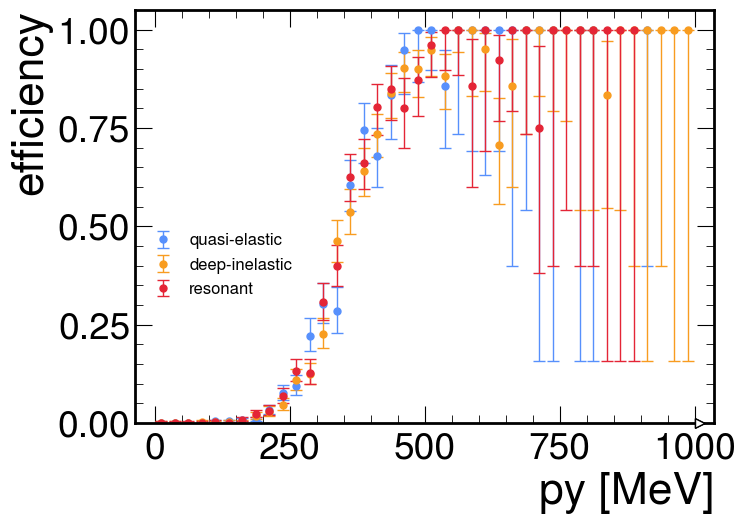

In [55]:
plt.style.use(hep.style.ROOT)
plt.rcParams.update({'font.size': 32})

#make real histogram
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

hep.histplot(
                h1/h2,
                # yerr is the relative shift from the y value
                yerr=abs(
                    clopper_pearson_interval(numerator.view(), denominator.view())
                    - numerator.view() / denominator.view()
                ),
                ax=axs,
                histtype="errorbar",
                capsize=4,
                linewidth=1,
                label = "quasi-elastic"
            )
hep.histplot(
                h3/h4,
                # yerr is the relative shift from the y value
                yerr=abs(
                    clopper_pearson_interval(numerator1.view(), denominator1.view())
                    - numerator1.view() / denominator1.view()
                ),
                ax=axs,
                histtype="errorbar",
                capsize=4,
                linewidth=1,
                label = "deep-inelastic"
            )
hep.histplot(
                h5/h6,
                # yerr is the relative shift from the y value
                yerr=abs(
                    clopper_pearson_interval(numerator2.view(), denominator2.view())
                    - numerator2.view() / denominator2.view()
                ),
                ax=axs,
                histtype="errorbar",
                capsize=4,
                linewidth=1,
                label = "resonant"
            )

axs.set_xlabel("py [MeV]")
axs.set_ylabel("efficiency")
axs.legend(fontsize=12,bbox_to_anchor=(0.3, 0.5))
# plt.title("deep-inelastic efficiency")
# plt.text(10, 0.75 ,'cuts in num: pos, E, pdgID, trig', fontsize = 10)
# plt.text(10, 0.70 ,'cuts in denom: pos, E, pdgID', fontsize = 10)
fig.tight_layout()
fig.savefig("E_efficiency.png")

In [ ]:
reco_E_trig = pad_Electron_E[pad_Electron_py>325]
truth_E_trig = pad_TruthEcal_E[pad_Electron_py>325]
reco_E_trig_f = pad_Electron_E[pad_Electron_py<=325]
truth_E_trig_f = pad_TruthEcal_E[pad_Electron_py<=325]
trig_py = pad_TruthEcal_py[pad_Electron_py>325]
trig_py_f = pad_TruthEcal_py[pad_Electron_py<=325]

reco_x_trig = pad_Electron_ecal_x[pad_Electron_py>325]
truth_x_trig = pad_TruthEcal_x[pad_Electron_py>325]

reco_y_trig = pad_Electron_ecal_y[pad_Electron_py>325]
truth_y_trig = pad_TruthEcal_y[pad_Electron_py>325]

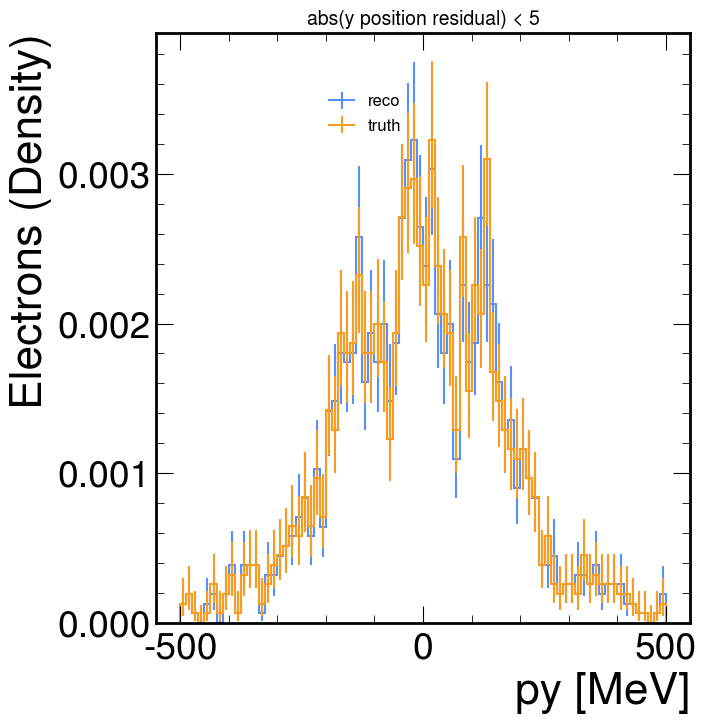

In [ ]:
plt.style.use(hep.style.ROOT)
plt.rcParams.update({'font.size': 32})

#create axis
gen_axis = hist.axis.Regular(80, -500, 500, name='residuals', label=r'py [MeV]')
h1 = hist.Hist(gen_axis)
h2 = hist.Hist(gen_axis)
h3 = hist.Hist(gen_axis)

#fill
h1.fill(pad_Electron_py_y)
h2.fill(pad_TruthEcal_py_y)
# h3.fill(abs(cut_Electron_ecal_y_y)[abs(cut_Electron_py_y)>325] - abs(cut_TruthEcal_y_y)[abs(cut_Electron_py_y)>325])

#print out histogram
h1
h2


#make real histogram
fig, axs = plt.subplots(1, 1, figsize=(8, 8))

# # use mplhep to directly plot the histogram
hep.histplot(
    h1, # histogram
    ax=axs,  # axis
    density=True, # whether to normalize the histogram to 1 or not
    label="reco", # label of histogram
    flow="none"
)
hep.histplot(
    h2, # histogram
    ax=axs,  # axis
    density=True, # whether to normalize the histogram to 1 or not
    label="truth", # label of histogram
    flow="none"
)
# hep.histplot(
#     h3, # histogram
#     ax=axs,  # axis
#     density=True, # whether to normalize the histogram to 1 or not
#     label="abs(y)<40", # label of histogram
#     flow="none"
# )


axs.set_ylabel("Electrons (Density)")
axs.legend(fontsize=12,bbox_to_anchor=(0.49, 0.8))
plt.title("abs(y position residual) < 5", fontsize = 14)
fig.tight_layout()
fig.savefig("ecal_x.png")